In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mnlogit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

index_col=0 - Убрали лишнюю колонку с индексами

In [ ]:

df_cs = pd.read_csv("D:\Eduson_data\Customer Segmentation.csv", index_col=0)
print(df_cs.head())

⚪ One-Way ANOVA ◾ ols ◾ groupby

In [ ]:
# TODO создаём таблицу наблюдений с удалёными NaN в Graduated
df_cs = df_cs[df_cs.Graduated.notna()]

model = ols('Age ~ Segmentation', df_cs).fit()
print(anova_lm(model), '\n')
# model.summary()

shapiro one-way

In [28]:
shapiro(model.resid)

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9366268515586853, pvalue=0.0)

QQ - plot one-way

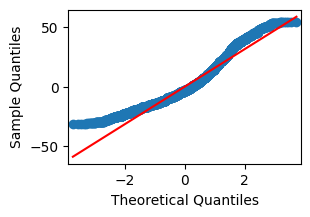

In [29]:
fig, axes = plt.subplots(figsize=(3, 2))
sm.qqplot(model.resid, line='s', ax=axes)
plt.show()

post hoc ◾ Тьюки one-way

In [30]:
tukey_test = pairwise_tukeyhsd(endog=df_cs.Age, groups=df_cs.Segmentation)
tukey_test.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

levene ◾ one-way
* H0 - дисперсии в двух выборках не имеют значимых различий.

In [63]:
# TODO Извлекаем столбцы Age/A/B/C/D, из df сгруппированного по Segmentation
group_one = []
for name, data in df_cs.groupby('Segmentation'):
  group_one.append(data.Age)
  print(name)
lev = stats.levene(*group_one)
print(lev)

A
B
C
D
LeveneResult(statistic=4.623146038695482, pvalue=0.0031005673871797052)


⚪ Two-way ANOVA -- двухфакторная

In [36]:
model_two_way = ols('Age ~ Segmentation + Graduated +  Segmentation:Graduated', df_cs).fit()
print(anova_lm(model_two_way))

                             df        sum_sq        mean_sq           F  \
Segmentation                3.0  3.541179e+05  118039.307058  493.786071   
Graduated                   1.0  5.609825e+04   56098.251088  234.672125   
Segmentation:Graduated      3.0  2.871598e+04    9571.992294   40.041886   
Residual                10585.0  2.530339e+06     239.049487         NaN   

                               PR(>F)  
Segmentation            2.474155e-300  
Graduated                2.079184e-52  
Segmentation:Graduated   1.011249e-25  
Residual                          NaN  


shapiro two-way

In [37]:
shapiro(model_two_way.resid)

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9235607385635376, pvalue=0.0)

QQ - plot two_way

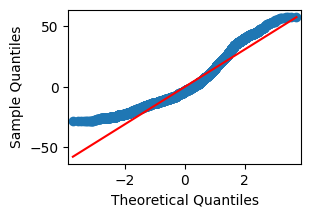

In [38]:
fig, axes = plt.subplots(figsize=(3, 2))
sm.qqplot(model_two_way.resid, line='s', ax=axes)
plt.show()

 post hoc ◾ Тьюки  two-way
 * Н0 - между средними групп различий нет

In [40]:
# TODO Добавляем столбец 'Combi' для pairwise_tukeyhsd
df_cs['Combi'] = df_cs.Segmentation + '/' + df_cs.Graduated
# df_cs

ID  Gender Ever_Married  Age Graduated     Profession  \
0      460394  Female           No   32       Yes     Healthcare   
1      461798  Female           No   56       Yes         Artist   
2      464976    Male          Yes   75        No         Lawyer   
3      462104    Male          Yes   39        No  Entertainment   
4      464829    Male           No   22        No     Healthcare   
...       ...     ...          ...  ...       ...            ...   
10690  462861  Female           No   30       Yes     Healthcare   
10691  464409  Female          Yes   81       Yes         Lawyer   
10692  465861  Female           No   40       Yes  Entertainment   
10693  465056    Male          Yes   87       Yes         Lawyer   
10694  461637    Male          Yes   51       Yes         Artist   

       Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  Combi  
0                  9.0            Low          3.0  Cat_6            D  D/Yes  
1                  0.0            Low          1.0  Cat_6            A  A/Yes  
2                  1.0            Low          1.0  Cat_4            D   D/No  
3                  9.0            Low          2.0  Cat_3            D   D/No  
4                  9.0            Low          5.0  Cat_4            D   D/No  
...                ...            ...          ...    ...          ...    ...  
10690              8.0            Low          1.0  Cat_6            D  D/Yes  
10691              0.0        Average          2.0  Cat_6            A  A/Yes  
10692             14.0            Low          1.0  Cat_6            A  A/Yes  
10693              1.0           High          2.0  Cat_6            A  A/Yes  
10694              1.0            Low          2.0  Cat_7            B  B/Yes  

[10593 rows x 12 columns]

In [42]:
tukey_to_way = pairwise_tukeyhsd(endog=df_cs.Age, groups=df_cs.Combi, alpha=0.05)
tukey_to_way.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

levene ◾ TWO-WAY

In [43]:
# TODO группируем df по элементам признаков Segmentation' и 'Graduated, извлекаем имена и под-таблицы
groups = []
for grp_name, data in df_cs.groupby(['Segmentation', 'Graduated']):
  groups.append(data.Age)
  print(grp_name)

('A', 'No')
('A', 'Yes')
('B', 'No')
('B', 'Yes')
('C', 'No')
('C', 'Yes')
('D', 'No')
('D', 'Yes')


In [44]:

lev = stats.levene(*groups)
print(lev, '\n')


LeveneResult(statistic=31.78461584118632, pvalue=5.872980094095988e-44) 



pingouin one-way


In [66]:
# Объединяем данные в один DataFrame
df_long = df_cs[['Age', 'Segmentation']]  # Age — числовой, Segmentation — группы

welch_anova = pg.welch_anova(dv='Age', between='Segmentation', data=df_long)
print(welch_anova)

         Source  ddof1       ddof2           F          p-unc       np2
0  Segmentation      3  5823.21904  473.322628  3.219731e-275  0.119261


pingouin two-way

In [67]:
# TODO Pingouin делает взаимодействие факторов автоматически в стандартной pg.anova(), если  оба фактора в between.
# Без взаимодействия факторов:
anova_two_way = pg.anova(dv='Age', between=['Segmentation', 'Graduated'], data=df_cs)
print(anova_two_way)

                     Source            SS       DF            MS           F  \
0              Segmentation  2.450555e+05      3.0  81685.173479  341.708215   
1                 Graduated  5.609825e+04      1.0  56098.251088  234.672125   
2  Segmentation * Graduated  2.871598e+04      3.0   9571.992294   40.041886   
3                  Residual  2.530339e+06  10585.0    239.049487         NaN   

           p-unc       np2  
0  8.220507e-212  0.088296  
1   2.079184e-52  0.021689  
2   1.011249e-25  0.011221  
3            NaN       NaN  
